# Ideological Inclination of the Guardian




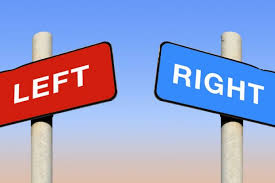

# 1. Introduction and Background

# 1.1 Introduction

The aim of this project is to study the use of left-wing and right-wing vocabulary in the news language used to cover the World News section of The Guardian. The project will explore the language it employs in reporting world news in light of the ideological inclination claimed by the newspaper. The Guardian has had a history of siding with the Labour Party. In 2004, The Guardian’s feature editor Ian Katz asserted that “it is no secret we are a centre-left newspaper”. The Scott Trust, the company that owns the newspaper, describes it as a “quality national newspaper without party affiliation faithful to its liberal tradition” (Scott Trust, 2015).

The beginning of the media age still assumed some objectivity in news media language and strived for the same. A shift occurred around the 1950s and 1960s where the possibility of objectivity was denied and the focus changed to examining the bias of the journalists and the stakeholders of the news media organisation to analyse their position in the news they cover. In this project, we ran our corpus of articles from The Guardian against a list of left words and right wing words and phrases to analyse which language it dominantly uses. The list has been compiled from sources such Washington Post, New Republic, CBS News, and The Guardian itself.



# 1.2 Relevance

The topic for this project was chosen out of curiosity, to see if The Guardian is as “centrist” as it claims to be. However, there are consequences if it turns out that The Guardian is portraying itself differently from what it actually is. As Edwards and Cromwell point out, most of our current global landscape revolves around multinational corporations, our media landscape included. This means that the media is often tasked to discuss and critique the corporations they are owned by, causing an inherent bias and conflict of interest (Edwards & Cromwell, 2006, 1). The Guardian calls itself centrist in an effort to appeal to both sides — or, everyone. However, there is no such thing as a corporate-free press. As Edwards and Cromwell quite pointedly write: “‘the corporate free press’ is not indicative of an honest, rational, consensus in a free society; it is symptomatic of an all-pervasive media corruption, of a deep cultural malaise. The silence, quite simply, is a lie” (1-2). While this might not matter to some people, it is important to keep in mind that mass media generally influences public perceptions and attitudes towards certain topics.

Previous studies have shown that politics can influence the content of media, and that the news tends to go along with political agendas. For example, a study by Carvalho and Burgess (2005) has shown that “coverage of climate change in the UK was linked to the political agenda; the media built images of scientific knowledge and uncertainty and emphasized risks and impacts in relation to political preferences” (Dotson et al., 2012, 65). Moreover, another study found that news coverage in the United States places more “emphasis upon climate change uncertainty than their equivalents in the UK, Finland, and New Zealand” (65).

In other words, the way issues are framed in media influences both public perception, institutions, and policy research (Marier & Revelli, 2017, 1637). _This_ is exactly the reason why people should be critical of news outlets and the political leaning they claim to adhere to. Therefore, this small study aims to promote critical thinking and media literacy in relation to news outlets, as they quite literally have an influence on the steps society might take in the future.


# 2. Tutorial

## 2.1 Data Scraping

Import the pandas library to manipulate and analyze data, and import the requests library to make HTTP requests in Python.

In [ ]:
import pandas as pd
import requests

### 2.1.1 Scrape the Data from API

We will use free [The Guardian API](https://open-platform.theguardian.com/explore/). We want to scrape all the articles under the "World" section in 2022 and we define the URL.

### Define URL

Based on the API link, first we can use variables to generate date list of 2022 'https://content.guardianapis.com/world?{randomDate}&show-tags=all&show-blocks=all&page-size=10&api-key=4c043d21-d53e-4a99-a6f3-1a08745b7575'


In [ ]:
# World Newa, 202201, concatenation of month
from datetime import datetime, timedelta

# Define the start and end dates
start_date = datetime(2022, 1, 1)
end_date = datetime(2022, 12, 31)

# generate monthly date ranges
def generate_monthly_ranges(start_date, end_date):
    current_date = start_date
    date_ranges = []

    while current_date <= end_date:
        next_month = current_date.replace(day=1) + timedelta(days=32)
        first_day_of_next_month = next_month.replace(day=1)
        last_day_of_month = (first_day_of_next_month - timedelta(days=1))

        date_ranges.append(
            f"from-date={current_date.strftime('%Y-%m-%d')}&to-date={last_day_of_month.strftime('%Y-%m-%d')}"
        )

        current_date = first_day_of_next_month

    return date_ranges

# Generate and print date ranges for each month
dateList = generate_monthly_ranges(start_date, end_date)

#print(dateList)

url_without_date = 'https://content.guardianapis.com/world?{randomDate}&show-tags=all&show-blocks=all&page-size=10&api-key=4c043d21-d53e-4a99-a6f3-1a08745b7575'
url_with_date = []
for date in dateList:
    newUrl = url_without_date.format(randomDate = date)
    url_with_date.append(newUrl)
url_with_date

['https://content.guardianapis.com/world?from-date=2022-01-01&to-date=2022-01-31&show-tags=all&show-blocks=all&page-size=10&api-key=4c043d21-d53e-4a99-a6f3-1a08745b7575',
 'https://content.guardianapis.com/world?from-date=2022-02-01&to-date=2022-02-28&show-tags=all&show-blocks=all&page-size=10&api-key=4c043d21-d53e-4a99-a6f3-1a08745b7575',
 'https://content.guardianapis.com/world?from-date=2022-03-01&to-date=2022-03-31&show-tags=all&show-blocks=all&page-size=10&api-key=4c043d21-d53e-4a99-a6f3-1a08745b7575',
 'https://content.guardianapis.com/world?from-date=2022-04-01&to-date=2022-04-30&show-tags=all&show-blocks=all&page-size=10&api-key=4c043d21-d53e-4a99-a6f3-1a08745b7575',
 'https://content.guardianapis.com/world?from-date=2022-05-01&to-date=2022-05-31&show-tags=all&show-blocks=all&page-size=10&api-key=4c043d21-d53e-4a99-a6f3-1a08745b7575',
 'https://content.guardianapis.com/world?from-date=2022-06-01&to-date=2022-06-30&show-tags=all&show-blocks=all&page-size=10&api-key=4c043d21-d53e

We have decided to scrape 100 articles per month, adhering to the API rules, which provide data per page with a limit of 10 articles. Consequently, for each month, we aim to scrape 10 pages. However, it's worth noting that the last page of the month may not always contain 10 articles. To address the issue of unequal sample sizes, we exclude the last page of each month during the selection process. For example, the last page in April only had 4 articles.

In [ ]:
# World Newa, 202201, concatenation of page
import random
url_full = []
for url in url_with_date:
    response=requests.get(url)
    x = response.json()
    total_pages = x['response']['pages']
    random_pages = random.sample(range(1, total_pages - 1), 10)
    for page in random_pages:
        url_with_page = url + '&page=' + str(page)
        url_full.append(url_with_page)
url_full

['https://content.guardianapis.com/world?from-date=2022-01-01&to-date=2022-01-31&show-tags=all&show-blocks=all&page-size=10&api-key=4c043d21-d53e-4a99-a6f3-1a08745b7575&page=68',
 'https://content.guardianapis.com/world?from-date=2022-01-01&to-date=2022-01-31&show-tags=all&show-blocks=all&page-size=10&api-key=4c043d21-d53e-4a99-a6f3-1a08745b7575&page=39',
 'https://content.guardianapis.com/world?from-date=2022-01-01&to-date=2022-01-31&show-tags=all&show-blocks=all&page-size=10&api-key=4c043d21-d53e-4a99-a6f3-1a08745b7575&page=53',
 'https://content.guardianapis.com/world?from-date=2022-01-01&to-date=2022-01-31&show-tags=all&show-blocks=all&page-size=10&api-key=4c043d21-d53e-4a99-a6f3-1a08745b7575&page=4',
 'https://content.guardianapis.com/world?from-date=2022-01-01&to-date=2022-01-31&show-tags=all&show-blocks=all&page-size=10&api-key=4c043d21-d53e-4a99-a6f3-1a08745b7575&page=3',
 'https://content.guardianapis.com/world?from-date=2022-01-01&to-date=2022-01-31&show-tags=all&show-blocks=

### 2.1.2 Get Texts

Use requests to get all the response from lists of URL and store the responses in list in output.

In [ ]:
info=[]
def json(url1):
    response=requests.get(url1)
    x=response.json()
    info.append(x)

In [ ]:
info=[]
output=[json(url1) for url1 in url_full]

In [ ]:
len(url_full)

120

The API provides a wealth of information unrelated to our research. Therefore, we are only extracting the relevant data, including type, web title, section name, web publication date, web URL, tags, and elements. All this data is saved in the 'info' list.

In [ ]:
extracted_data = [
    {
        'type': item['type'],
        'webTitle': item['webTitle'],
        'sectionName': item['sectionName'],
        'webPublicationDate': item['webPublicationDate'],
        'webUrl': item['webUrl'],
        'tags': [
            {
                'tagTitle': tag['webTitle'],
                'tagURL': tag['webUrl'],
            }
            for tag in item['tags']
        ],
        'tagCount': len(item['tags']),
        'bodyTextSummary': item['blocks']['body'][0]['bodyTextSummary'],

    }
    for x in info
    if 'results' in x['response']
    for item in x['response']['results']
]




### 2.1.3 Save corpus in text files

We intend to use the article title as the filename. Therefore, we need to remove special characters. Additionally, to prevent overwriting, we are employing Counter() to append suffixes to files with the same name.

In [ ]:
import os
from collections import Counter

def cleanFilename(filename):
    invalid_chars = '<>:"/\\|?*'
    for char in invalid_chars:
        filename = filename.replace(char, '_')
    return filename

output_directory = 'Guardian_corpus_txt_improved'
file_counts = Counter()
iteration_count = 0
file_names=[]

# Create the output directory if it doesn't exist
os.makedirs(output_directory, exist_ok=True)

for line in extracted_data:
    base_filename = cleanFilename(line['webTitle'])
    extension = '.txt'
    filename = base_filename + extension
    output_path = os.path.join(output_directory, filename)

    # Check if the filename already exists
    count = file_counts[filename]
    while output_path in file_names:
        # If yes, increment the count and add the suffix
        count += 1
        filename = f"{base_filename}-{count}{extension}"
        output_path = os.path.join(output_directory, filename)

    file_counts[filename] = count
    file_names.append(output_path)

    with open(output_path, 'w', encoding='utf-8') as file:
        # Write the data dictionary to the file
        file.write(str(line))

    iteration_count += 1

print(f"Total iterations: {iteration_count}")


Total iterations: 1200


In [ ]:
#save corpus to txt
import os
from collections import Counter

def cleanFilename(filename):
    invalid_chars = '<>:"/\\|?*'
    for char in invalid_chars:
        filename = filename.replace(char, '_')
    return filename

output_directory = 'Guardian_corpus_txt_improved'
file_counts = Counter()
iteration_count = 0
file_names=[]

for line in extracted_data:
    base_filename = cleanFilename(line['webTitle'])
    extension = '.txt'
    filename = base_filename + extension

    # Check if the filename already exists
    count = file_counts[filename]
    while os.path.join(output_directory, filename) in file_names:
        # If yes, increment the count and add the suffix
        count += 1
        filename = f"{base_filename}-{count}{extension}"

    file_counts[filename] = count
    file_names.append(os.path.join(output_directory, filename))

    with open(os.path.join(output_directory, filename), 'w', encoding='utf-8') as file:
        # Write the data dictionary to the file
        file.write(str(line))

    iteration_count += 1

print(f"Total iterations: {iteration_count}")


Total iterations: 1200


## 2.2 Data Quality Check

While collecting data, we encountered instances where the results did not meet our expectations. We invested considerable effort in troubleshooting to identify and address the issues. As the debugging process is omitted from the main sections, we believe it is a valuable experience in data collection. In this section, we will explain how we identified and resolved the problems.

### 2.2.1 check the amount of articles per month

Ideally, we should have a total of 1200 articles. However, we observed that there are only 1194 in total. This discrepancy arose from inadvertently selecting the last page of April, which only contains 4 articles. To ensure a consistent count of 100 articles per month, we write functions to verify the number of articles for each month.

In [ ]:
#test bring into table
#print(extracted_data[1])
corpus_df = pd.DataFrame(extracted_data)
corpus_df.to_csv('Guardian_corpus.csv', index=False)
print(corpus_df.head(2))
corpus_df.head(2)

      type                                           webTitle sectionName  \
0  article      Almost 200,000 new Covid cases reported in UK  World news   
1  article  Macron rebuke to unvaccinated citizens incurs ...  World news   

     webPublicationDate                                             webUrl  \
0  2022-01-05T16:35:13Z  https://www.theguardian.com/world/2022/jan/05/...   
1  2022-01-05T15:48:21Z  https://www.theguardian.com/world/2022/jan/05/...   

                                                tags  tagCount  \
0  [{'tagTitle': 'Coronavirus', 'tagURL': 'https:...        13   
1  [{'tagTitle': 'Emmanuel Macron', 'tagURL': 'ht...        14   

                                     bodyTextSummary  
0  Almost 200,000 more Covid cases have been repo...  
1  Emmanuel Macron faced criticism from political...  


,type,webTitle,sectionName,webPublicationDate,webUrl,tags,tagCount,bodyTextSummary
0,article,"Almost 200,000 new Covid cases reported in UK",World news,2022-01-05T16:35:13Z,https://www.theguardian.com/world/2022/jan/05/...,"[{'tagTitle': 'Coronavirus', 'tagURL': 'https:...",13,"Almost 200,000 more Covid cases have been repo..."
1,article,Macron rebuke to unvaccinated citizens incurs ...,World news,2022-01-05T15:48:21Z,https://www.theguardian.com/world/2022/jan/05/...,"[{'tagTitle': 'Emmanuel Macron', 'tagURL': 'ht...",14,Emmanuel Macron faced criticism from political...


In [ ]:
# Convert 'webPublicationDate' to datetime object
corpus_df['webPublicationDate'] = pd.to_datetime(corpus_df['webPublicationDate'])

# Extract the month from the 'webPublicationDate' column
corpus_df['month'] = corpus_df['webPublicationDate'].dt.to_period('M')

# Example: If you have a 'webPublicationDate' column in your DataFrame
web_publication_month_counts = corpus_df['month'].value_counts()

# Display the unique months and their counts
print("Number of unique months:", len(web_publication_month_counts))
print("\nUnique months and their counts:")
print(web_publication_month_counts)


Number of unique months: 12

Unique months and their counts:
2022-01    100
2022-02    100
2022-03    100
2022-04    100
2022-05    100
2022-06    100
2022-07    100
2022-08    100
2022-09    100
2022-10    100
2022-11    100
2022-12    100
Freq: M, Name: month, dtype: int64


<ipython-input-11-1d14081f6694>:5: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  corpus_df['month'] = corpus_df['webPublicationDate'].dt.to_period('M')


### 2.2.2 Prevent Overwriting

We noticed that the number of text files is 1195, which is less than the expected 1200. After comparing the file names with the dataframe list, we identified the presence of identical web titles, which are used as file names. Consequently, the files were being overwritten.
(P.S.: If you run the code now, you will not encounter the same output as we have already addressed and removed the problematic code.)

In [ ]:
# count files
print(f"Total iterations: {iteration_count}")

Total iterations: 1200


In [ ]:
# count dataframe
corpus_df['webTitle'].count()

1200

Here, we find the rewrite file name.

In [ ]:
from collections import Counter
len(set(file_names))
# Use Counter to count occurrences of each element
element_counts = Counter(file_names)
# Find repeated elements (elements with count greater than 1)
repeated_elements = [element for element, count in element_counts.items() if count > 1]

# Print the repeated elements
print(repeated_elements)

[]


Since we identified the problem, we added lines of code to verify if the file names are repeated, and we appended a suffix to the repeated ones. The solution is presented in the "Save Corpus in Text Files" section.

## 2.3 Data Processing

### 2.3.1 Data Preprocessing

This is to preprocess the data scraped from the website, and create a metadata and data csv file containing information about articles on the Guardian and articles themselves, which is convinient for human to read and for machine to analyze.

### Installing and Importing

In [ ]:
# Import os to upload documents and metadata
import os
# Imprort yaml
import yaml
# Import json
import json
# Import pandas DataFrame packages
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'

### Create a DataFrame from parsing JSON strings in all files

The data we scraped from the website by Gaurdian API are structured and stored in txt files. The form of data is JSON, also as known as JavaScript Object Notation. As JSON is a lightweight data-interchange format that is easy for humans to read and write, we can clearly recognized metadata and data information from these txt files. JSON is also pretty easy for machine to parse and generate. This step is to use python language and to import yaml to parse these JSON strings and then create a DataFrame. We will get keys like Web Title, Section Name,Web Publication Date, Web URL, Tags, Tag Count and Body Text Summary, which is needed for next analysis. Every key maps to a specific value. We store these keys and values into corresponding columns within the dataframe.

In [ ]:
# Create empty list for storing data
all_data = []

# Specify the directory where the files are located
folder_path = 'Guardian_corpus_txt_improved'

# Iterate through each file in the folder
for file_name in os.listdir(folder_path):
    # Construct the full file path
    file_path = os.path.join(folder_path, file_name)

    # Make sure to process txt files only
    if os.path.isfile(file_path) and file_path.endswith('.txt'):
        # Read txt files
        with open(file_path, 'r', encoding='utf-8') as file:
          file_content = file.read()

        # Use yaml to parse JSON data
        try:
            data = yaml.safe_load(file_content)
            all_data.append(data)
        except yaml.YAMLError as e:
            print(f"Error parsing JSON in {file_name}: {e}")

# Transform the data into Pandas DataFrame
df = pd.DataFrame(all_data)

# Look at the head of the DataFrame
print(f"Total files processed: {len(all_data)}")
df.head()

Total files processed: 1200


,type,webTitle,sectionName,webPublicationDate,webUrl,tags,tagCount,bodyTextSummary
0,article,Pakistan declares floods a ‘climate catastroph...,World news,2022-08-28T09:18:07Z,https://www.theguardian.com/world/2022/aug/28/...,"[{'tagTitle': 'Pakistan', 'tagURL': 'https://w...",14,A Pakistani minister has called the country’s ...
1,article,It’s time to give up flying on holiday | Letters,World news,2022-08-01T16:17:27Z,https://www.theguardian.com/world/2022/aug/01/...,"[{'tagTitle': 'Air transport', 'tagURL': 'http...",11,Gaby Hinsliff’s article (Travel chaos and unde...
2,article,Russia-Ukraine war latest: what we know on day...,World news,2022-08-19T11:06:31Z,https://www.theguardian.com/world/2022/aug/19/...,[{'tagTitle': 'Russia-Ukraine war at a glance'...,11,Rescuers are searching for survivors and victi...
3,article,Frontline abortion workers in the US west are ...,World news,2022-11-04T17:50:15Z,https://www.theguardian.com/world/2022/nov/03/...,"[{'tagTitle': 'Abortion', 'tagURL': 'https://w...",12,States across the western US have seen a surge...
4,article,From nasal vaccines to pills: the next defence...,World news,2022-08-15T16:23:46Z,https://www.theguardian.com/world/2022/aug/15/...,"[{'tagTitle': 'Coronavirus', 'tagURL': 'https:...",13,When the autumn booster programme begins next ...


### Extracting and parsing data in Dataframe

In this step, we extract dada needed for analysis in the project, and parse values in the tag colunm, which are shown as a list that couldn't be directly used for analysis.



In [ ]:
# Used to store extracted data
web_titles = []
pub_time = []
web_tags = []
tag_count = []
web_url = []
article_text = []


# Iterate through the original DataFrame
for index, row in df.iterrows():
    # Extract the title
    title = row['webTitle']  # Assuming the article title is in the 'webTitle' column
    time = row ['webPublicationDate']
    count = row['tagCount']
    url = row['webUrl']
    article = row['bodyTextSummary']


    temp_tags = []



    # Examine whether the web has been processed
    if len(web_titles) > 0 and title == web_titles[-1] and time == pub_time[-1]:
        # if yes, add the new tag as the last tag in one raw
        if isinstance(row['tags'], list):
            for tag in row['tags']:
                if 'tagTitle' in tag:
                    web_tags[-1] += ", " + tag['tagTitle']  # Append the tag to the last item
    else:
        # if else, then process it as a new web in a new raw
        temp_tags = [tag['tagTitle'] for tag in row['tags'] if 'tagTitle' in tag] if isinstance(row['tags'], list) else []
        web_titles.append(title)
        pub_time.append(time)
        tag_count.append(count)
        web_url.append(url)
        article_text.append(article)
        web_tags.append(', '.join(temp_tags))  # Convert the list of tags to a comma-separated string


# Create a new DataFrame
d3 = {'WebTitle': web_titles, 'WebUrl' : web_url, 'PubTime':pub_time, 'Tags':web_tags, 'TagCounts':tag_count, 'Text':article_text}
metadata_df = pd.DataFrame(d3)

# Display the first few rows of the new DataFrame
metadata_df.head()

,WebTitle,WebUrl,PubTime,Tags,TagCounts,Text
0,Pakistan declares floods a ‘climate catastroph...,https://www.theguardian.com/world/2022/aug/28/...,2022-08-28T09:18:07Z,"Pakistan, Climate crisis, Extreme weather, Sou...",14,A Pakistani minister has called the country’s ...
1,It’s time to give up flying on holiday | Letters,https://www.theguardian.com/world/2022/aug/01/...,2022-08-01T16:17:27Z,"Air transport, Climate crisis, Environment, Fl...",11,Gaby Hinsliff’s article (Travel chaos and unde...
2,Russia-Ukraine war latest: what we know on day...,https://www.theguardian.com/world/2022/aug/19/...,2022-08-19T11:06:31Z,"Russia-Ukraine war at a glance, Ukraine, Russi...",11,Rescuers are searching for survivors and victi...
3,Frontline abortion workers in the US west are ...,https://www.theguardian.com/world/2022/nov/03/...,2022-11-04T17:50:15Z,"Abortion, Women, Roe v Wade, US supreme court,...",12,States across the western US have seen a surge...
4,From nasal vaccines to pills: the next defence...,https://www.theguardian.com/world/2022/aug/15/...,2022-08-15T16:23:46Z,"Coronavirus, Medical research, Pharmaceuticals...",13,When the autumn booster programme begins next ...


### 2.3.2 Data Cleaning


It is important to clean the data. Data cleaning refines and enhances the quality of datasets.

### Transforming data format

This step is to transform the time format to a datatime format.The previous format is ISO 8601, an international standard for date and time representations. We use the datetime module in python, and convert these ISO 8601 formatted strings into datetime objects.These objects are convenient to extract specific date or time components, or to calculate the difference between two dates,which could be useful for analysis.

In [ ]:
metadata_df['PubTime'] = pd.to_datetime(metadata_df['PubTime'])

metadata_df.head()

,WebTitle,WebUrl,PubTime,Tags,TagCounts,Text
0,Pakistan declares floods a ‘climate catastroph...,https://www.theguardian.com/world/2022/aug/28/...,2022-08-28 09:18:07+00:00,"Pakistan, Climate crisis, Extreme weather, Sou...",14,A Pakistani minister has called the country’s ...
1,It’s time to give up flying on holiday | Letters,https://www.theguardian.com/world/2022/aug/01/...,2022-08-01 16:17:27+00:00,"Air transport, Climate crisis, Environment, Fl...",11,Gaby Hinsliff’s article (Travel chaos and unde...
2,Russia-Ukraine war latest: what we know on day...,https://www.theguardian.com/world/2022/aug/19/...,2022-08-19 11:06:31+00:00,"Russia-Ukraine war at a glance, Ukraine, Russi...",11,Rescuers are searching for survivors and victi...
3,Frontline abortion workers in the US west are ...,https://www.theguardian.com/world/2022/nov/03/...,2022-11-04 17:50:15+00:00,"Abortion, Women, Roe v Wade, US supreme court,...",12,States across the western US have seen a surge...
4,From nasal vaccines to pills: the next defence...,https://www.theguardian.com/world/2022/aug/15/...,2022-08-15 16:23:46+00:00,"Coronavirus, Medical research, Pharmaceuticals...",13,When the autumn booster programme begins next ...


### Removing extra spaces

The beginnings of some of the texts may contain extra spaces (indicated by \t or \n). These characters can be replaced by a single space using the str.replace() method.

In [ ]:
# Remove extra spaces from papers
metadata_df['Text'] = metadata_df['Text'].str.replace('\s+', ' ', regex=True).str.strip()
metadata_df.head()

,WebTitle,WebUrl,PubTime,Tags,TagCounts,Text
0,Pakistan declares floods a ‘climate catastroph...,https://www.theguardian.com/world/2022/aug/28/...,2022-08-28 09:18:07+00:00,"Pakistan, Climate crisis, Extreme weather, Sou...",14,A Pakistani minister has called the country’s ...
1,It’s time to give up flying on holiday | Letters,https://www.theguardian.com/world/2022/aug/01/...,2022-08-01 16:17:27+00:00,"Air transport, Climate crisis, Environment, Fl...",11,Gaby Hinsliff’s article (Travel chaos and unde...
2,Russia-Ukraine war latest: what we know on day...,https://www.theguardian.com/world/2022/aug/19/...,2022-08-19 11:06:31+00:00,"Russia-Ukraine war at a glance, Ukraine, Russi...",11,Rescuers are searching for survivors and victi...
3,Frontline abortion workers in the US west are ...,https://www.theguardian.com/world/2022/nov/03/...,2022-11-04 17:50:15+00:00,"Abortion, Women, Roe v Wade, US supreme court,...",12,States across the western US have seen a surge...
4,From nasal vaccines to pills: the next defence...,https://www.theguardian.com/world/2022/aug/15/...,2022-08-15 16:23:46+00:00,"Coronavirus, Medical research, Pharmaceuticals...",13,When the autumn booster programme begins next ...


### Saving the metadata csv files

In [ ]:
# Remove extra spaces from papers
metadata_df['Text'] = metadata_df['Text'].str.replace('\s+', ' ', regex=True).str.strip()
metadata_df.head()


,WebTitle,WebUrl,PubTime,Tags,TagCounts,Text
0,Pakistan declares floods a ‘climate catastroph...,https://www.theguardian.com/world/2022/aug/28/...,2022-08-28 09:18:07+00:00,"Pakistan, Climate crisis, Extreme weather, Sou...",14,A Pakistani minister has called the country’s ...
1,It’s time to give up flying on holiday | Letters,https://www.theguardian.com/world/2022/aug/01/...,2022-08-01 16:17:27+00:00,"Air transport, Climate crisis, Environment, Fl...",11,Gaby Hinsliff’s article (Travel chaos and unde...
2,Russia-Ukraine war latest: what we know on day...,https://www.theguardian.com/world/2022/aug/19/...,2022-08-19 11:06:31+00:00,"Russia-Ukraine war at a glance, Ukraine, Russi...",11,Rescuers are searching for survivors and victi...
3,Frontline abortion workers in the US west are ...,https://www.theguardian.com/world/2022/nov/03/...,2022-11-04 17:50:15+00:00,"Abortion, Women, Roe v Wade, US supreme court,...",12,States across the western US have seen a surge...
4,From nasal vaccines to pills: the next defence...,https://www.theguardian.com/world/2022/aug/15/...,2022-08-15 16:23:46+00:00,"Coronavirus, Medical research, Pharmaceuticals...",13,When the autumn booster programme begins next ...


## 2.4 Data Analysis

Based on the metadata.csv generated from the data processing part, our group could launch several data analysis around the research question regarding ideological inclination of the Guardian. In this part, we calculate word frequencies of left-wing and right-wing words, and create world clouds seperatly. Also, we establish a score system, and based on this system, we make data visualization by creating a pie chart, which could clearly convey the information.

### 2.4.1 Word Frequencies Calculation

Import the re module in Python.

In [ ]:
# import re
import re
from collections import Counter

In [ ]:

#define word lists
left_wing_phrases = ['people of color', 'dogmatism ', 'populist', 'working class ', 'right wing ', 'alt right', 'safety net', 'extremist', 'white privilege', 'climate science', 'undocumented immigrant', 'black lives matter', 'trigger warnings', 'microaggressions', 'privilege', 'cultural appropriation']
right_wing_phrases = ['snowflake', 'entitlements', 'illegal alien', 'all lives matter', 'cultural elite', 'make .* great again', 'assault on the canon', '.* first', 'china virus', 'enemy of the people', 'fake news', 'political correctness', 'globalist', 'hoax', 'triggered', 'witch-hunt']

In [ ]:
# define counters to store outcome
left_wing_counts = Counter()
right_wing_counts = Counter()

In [ ]:
# converts the 'Text' column to string type
metadata_df['Text'] = metadata_df['Text'].astype(str)

In [ ]:
# loop through each article in the 'Text' column of the DataFrame
for text in metadata_df['Text']:

    # convert the text to lowercase to ensure case-insensitive matching
    text_lower = text.lower()

    # loop through each phrase in the left-wing phrases list
    for phrase in left_wing_phrases:

        # count the occurrences of the phrase in the text
        # re.escape is used to escape any special characters in the phrase
        phrase_count = len(re.findall(re.escape(phrase.lower()), text_lower))

        # update the count of the phrase in the left-wing counter
        left_wing_counts[phrase] += phrase_count

    # loop through each phrase in the right-wing phrases list
    for phrase in right_wing_phrases:

        # similar to above, count the occurrences of the phrase in the text
        phrase_count = len(re.findall(re.escape(phrase.lower()), text_lower))

        # update the count of the phrase in the right-wing counter
        right_wing_counts[phrase] += phrase_count

Then, we got the counts of each left-wing and right-wing word frequency.

In [ ]:
# print left-wing word frequencies and right-wing word frequencies
print("Left-wing word frequencies:", left_wing_counts)
print("Right-wing word frequencies:", right_wing_counts)

Left-wing word frequencies: Counter({'populist': 45, 'extremist': 40, 'privilege': 16, 'right wing ': 5, 'safety net': 4, 'black lives matter': 3, 'climate science': 2, 'people of color': 1, 'dogmatism ': 0, 'working class ': 0, 'alt right': 0, 'white privilege': 0, 'undocumented immigrant': 0, 'trigger warnings': 0, 'microaggressions': 0, 'cultural appropriation': 0})
Right-wing word frequencies: Counter({'triggered': 39, 'fake news': 15, 'globalist': 4, 'hoax': 2, 'snowflake': 1, 'entitlements': 0, 'illegal alien': 0, 'all lives matter': 0, 'cultural elite': 0, 'make .* great again': 0, 'assault on the canon': 0, '.* first': 0, 'china virus': 0, 'enemy of the people': 0, 'political correctness': 0, 'witch-hunt': 0})


Make a plot that shows left-wing word frequencies, and we do the same thing for right-wing word frequencies, the results of right-wing frequencies are shown in the word cloud part.



In [ ]:
# import 'matplotlib' library
import matplotlib.pyplot as plt

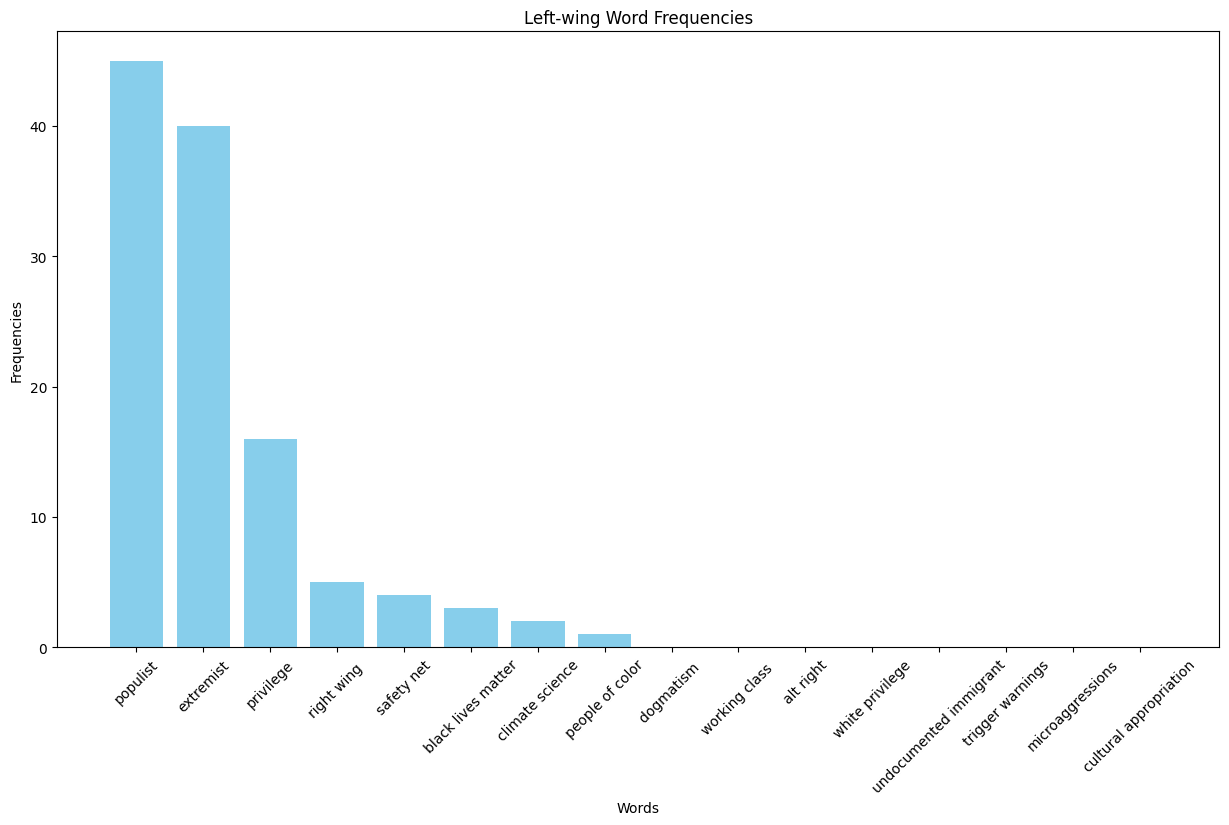

In [ ]:
# extract left-wing words data and sort it
left_labels, left_values = zip(*sorted(left_wing_counts.items(), key=lambda x: x[1], reverse=True))

# create a bar chart for left-wing word frequencies
plt.figure(figsize=(15, 8))
plt.bar(left_labels, left_values, color='skyblue')
plt.xlabel('Words')
plt.ylabel('Frequencies')
plt.title('Left-wing Word Frequencies')
plt.xticks(rotation=45)
plt.show()

### 2.4.2 Word Clouds

Word clouds can be a visually appealing way to represent the frequency of words in a given text. They provide a quick, at-a-glance overview of the most frequently occurring words, with the size of each word indicating its relative frequency.

In [ ]:
# install wordcloud module
!pip install wordcloud

In [ ]:
# import word cloud
from wordcloud import WordCloud

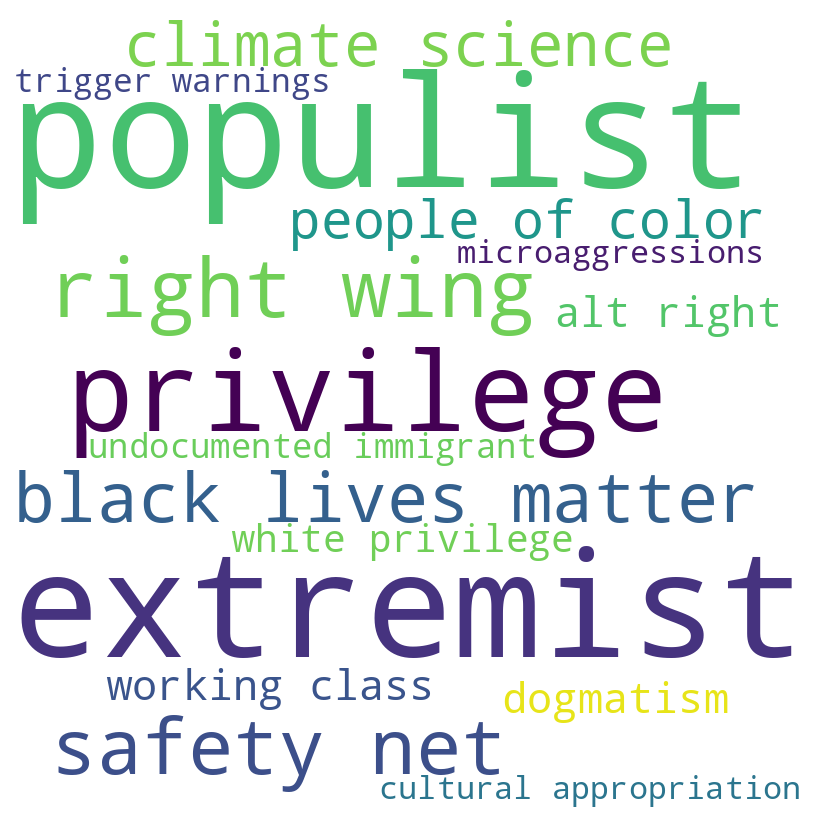

In [ ]:
# transform the frequencies by applying a sub-linear scaling. This will make high-frequency words stand out less and preserve the visibility of lower-frequency words.
# add 1 before raising to the power of 0.75 to prevent any zero frequencies from disappearing
transformed_frequencies = {word: (freq + 1)**0.75 for word, freq in left_wing_counts.items()}

# generate the word cloud using the transformed frequencies
wordcloud = WordCloud(width=800, height=800, background_color='white').generate_from_frequencies(transformed_frequencies)

# display the word cloud image
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

Here we analysis the right-wing word frequencies.

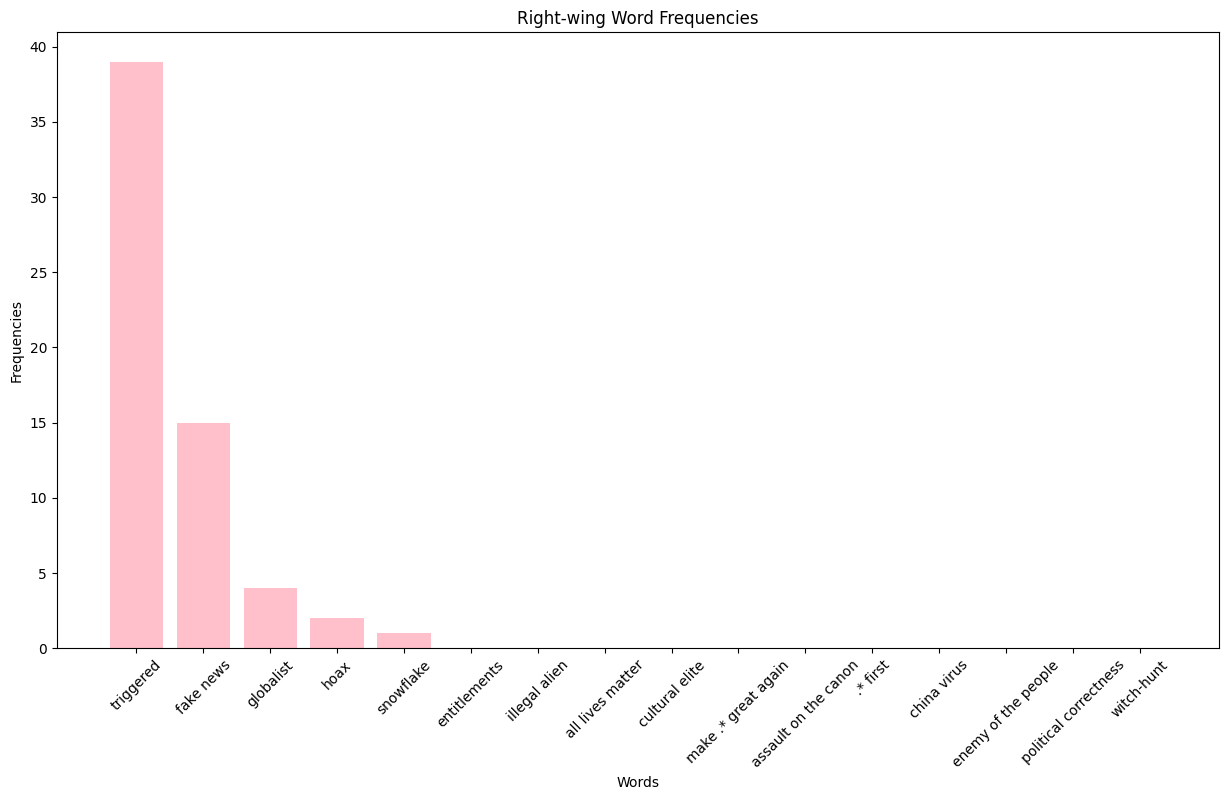

In [ ]:
# extract right-wing words data and sort it
right_labels, right_values = zip(*sorted(right_wing_counts.items(), key=lambda x: x[1], reverse=True))

# create a bar chart for right-wing word frequencies
plt.figure(figsize=(15, 8))
plt.bar(right_labels, right_values, color='pink')
plt.xlabel('Words')
plt.ylabel('Frequencies')
plt.title('Right-wing Word Frequencies')
plt.xticks(rotation=45)
plt.show()

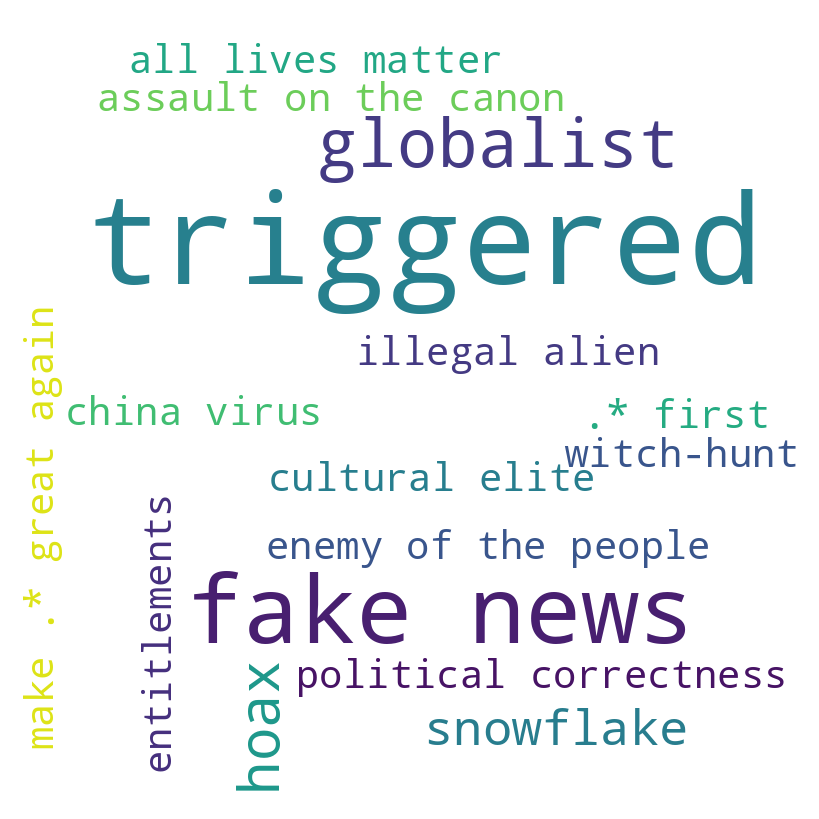

In [ ]:
# transform the frequencies by applying a sub-linear scaling. This will make high-frequency words stand out less and preserve the visibility of lower-frequency words.
# add 1 before raising to the power of 0.75 to prevent any zero frequencies from disappearing
transformed_frequencies = {word: (freq + 1)**0.75 for word, freq in right_wing_counts.items()}

# generate the word cloud using the transformed frequencies
wordcloud = WordCloud(width=800, height=800, background_color='white').generate_from_frequencies(transformed_frequencies)

# display the word cloud image
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

### 2.4.3 Left-wing and Right-wing Score

In this part, every piece of word news has undergone analysis, receiving scores reflecting both left-wing and right-wing perspectives.

In [ ]:
# define article_scores to store left-wing score and right-wing score of the article
article_scores = []

In [ ]:
# loop through each article in the 'Text' column of the DataFrame
for text in metadata_df['Text']:

    # initialize left and right wing scores
    left_score = 0
    right_score = 0

    # convert the text to lowercase to ensure case-insensitive matching
    text_lower = text.lower()

    # loop through each phrase in the left-wing phrases list
    for phrase in left_wing_phrases:

        # count the occurrences of the phrase in the text
        # re.escape is used to escape any special characters in the phrase
        phrase_count = len(re.findall(re.escape(phrase.lower()), text_lower))
        left_score += phrase_count

    # loop through each phrase in the right-wing phrases list
    for phrase in right_wing_phrases:

        #similar to above
        phrase_count = len(re.findall(re.escape(phrase.lower()), text_lower))
        right_score += phrase_count

    # append scores to article_scores
    article_scores.append({'left_score': left_score, 'right_score': right_score})

# print the score of each article
for i, scores in enumerate(article_scores):
    print(f"Article {i+1}: Left-wing score = {scores['left_score']}, Right-wing score = {scores['right_score']}")

Article 1: Left-wing score = 0, Right-wing score = 0
Article 2: Left-wing score = 0, Right-wing score = 0
Article 3: Left-wing score = 0, Right-wing score = 0
Article 4: Left-wing score = 0, Right-wing score = 0
Article 5: Left-wing score = 0, Right-wing score = 0
Article 6: Left-wing score = 0, Right-wing score = 0
Article 7: Left-wing score = 0, Right-wing score = 0
Article 8: Left-wing score = 0, Right-wing score = 0
Article 9: Left-wing score = 0, Right-wing score = 0
Article 10: Left-wing score = 0, Right-wing score = 0
Article 11: Left-wing score = 0, Right-wing score = 0
Article 12: Left-wing score = 0, Right-wing score = 0
Article 13: Left-wing score = 0, Right-wing score = 0
Article 14: Left-wing score = 0, Right-wing score = 0
Article 15: Left-wing score = 0, Right-wing score = 0
Article 16: Left-wing score = 0, Right-wing score = 0
Article 17: Left-wing score = 0, Right-wing score = 0
Article 18: Left-wing score = 0, Right-wing score = 0
Article 19: Left-wing score = 3, Righ

Calculate total left-wing score and right-wing score and make a pie chart.

In [ ]:
# initialize total scores of left and right wing
total_left_score = 0
total_right_score = 0

# loop through the score of each article
for scores in article_scores:
    total_left_score += scores['left_score']
    total_right_score += scores['right_score']

# print total scores of left and right wing
print(f"Total left-wing score: {total_left_score}")
print(f"Total right-wing score: {total_right_score}")

Total left-wing score: 116
Total right-wing score: 61


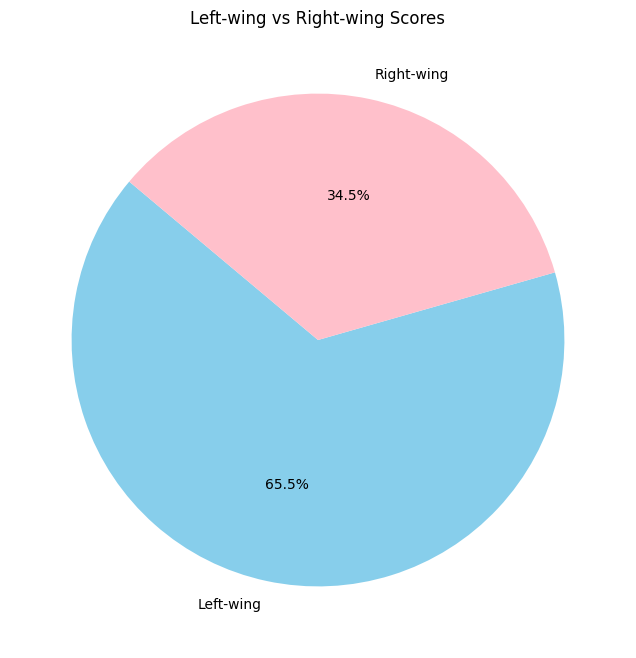

In [ ]:
# create pie chart for left-wing and right-wing scores
labels = ['Left-wing', 'Right-wing']
sizes = [total_left_score, total_right_score]

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'pink'])
plt.title('Left-wing vs Right-wing Scores')
plt.show()

Based on the results of data analysis, it can be concluded that the world news articles published by The Guardian in 2022 display a tendency towards a left-wing perspective. While the scores do not show a significant imbalance, suggesting The Guardian's overall position as relatively impartial, and is with a slight inclination towards the left-wing.

##3. Active Learning Exercise


We can analyze the sentiment of each article in the same way as the score calculation mentioned before.
Sentiment sub-reference to SentiWordNet's paper. In SentiWordNet's article, the author lists the top 10 POSITIVE words and the top 10 NEGATIVE words in order.We can use these data to make a simple analysis of the linguistic sentiment of news texts. So based on these data. Let's answer this question. What are the emotional tendencies of the Guardian news?

https://github.com/aesuli/SentiWordNet/blob/master/papers/LREC10.pdf

In [ ]:

#define word lists
Positive_phrases = ['good', 'goodness ', 'better off', 'divine ', 'elysian', 'inspired', 'safety net', 'good enough', 'solid', 'superb']
Negative_phrases = ['abject', 'deplorable', 'distressing', 'lamentable', 'pitiful', 'sad', 'sorry', 'bad', 'unfortunate', 'unsound']

In [ ]:
# define article_scores to store positive score and negative score of the article
article_scores = []

In [ ]:
# loop through each article in the 'Text' column of the DataFrame
for text in metadata_df['Text']:

    # initialize positive and negative wing scores
    Positive_score = 0
    Negative_score = 0

    # convert the text to lowercase to ensure case-insensitive matching
    text_lower = text.lower()

    # loop through each phrase in the positive phrases list
    for phrase in Positive_phrases :

        # count the occurrences of the phrase in the text
        # re.escape is used to escape any special characters in the phrase
        phrase_count = len(re.findall(re.escape(phrase.lower()), text_lower))
        Positive_score += phrase_count

    # loop through each phrase in the negative phrases list
    for phrase in Negative_phrases:

        #similar to above
        phrase_count = len(re.findall(re.escape(phrase.lower()), text_lower))
        Negative_score += phrase_count

    # append scores to article_scores
    article_scores.append({'Positive_score': Positive_score, 'Negative_score': Negative_score})

# print the score of each article
for i, scores in enumerate(article_scores):
    print(f"Article {i+1}: Positive_score = {scores['Positive_score']},  Negative_score = {scores['Negative_score']}")

Article 1: Positive_score = 0,  Negative_score = 5
Article 2: Positive_score = 0,  Negative_score = 0
Article 3: Positive_score = 0,  Negative_score = 0
Article 4: Positive_score = 0,  Negative_score = 0
Article 5: Positive_score = 0,  Negative_score = 0
Article 6: Positive_score = 0,  Negative_score = 0
Article 7: Positive_score = 0,  Negative_score = 0
Article 8: Positive_score = 1,  Negative_score = 1
Article 9: Positive_score = 0,  Negative_score = 3
Article 10: Positive_score = 0,  Negative_score = 3
Article 11: Positive_score = 0,  Negative_score = 1
Article 12: Positive_score = 0,  Negative_score = 1
Article 13: Positive_score = 2,  Negative_score = 0
Article 14: Positive_score = 1,  Negative_score = 1
Article 15: Positive_score = 1,  Negative_score = 0
Article 16: Positive_score = 0,  Negative_score = 0
Article 17: Positive_score = 0,  Negative_score = 0
Article 18: Positive_score = 0,  Negative_score = 0
Article 19: Positive_score = 3,  Negative_score = 2
Article 20: Positive_

In [ ]:
# initialize total scores of positive and negative wing
total_positive_score = 0
total_negative_score = 0

# loop through the score of each article
for scores in article_scores:
    total_positive_score += scores['Positive_score']
    total_negative_score += scores['Negative_score']

# print total scores of positive and negative wing
print(f"Total positive score: {total_positive_score}")
print(f"Total negative score: {total_negative_score}")

Total positive score: 490
Total negative score: 563


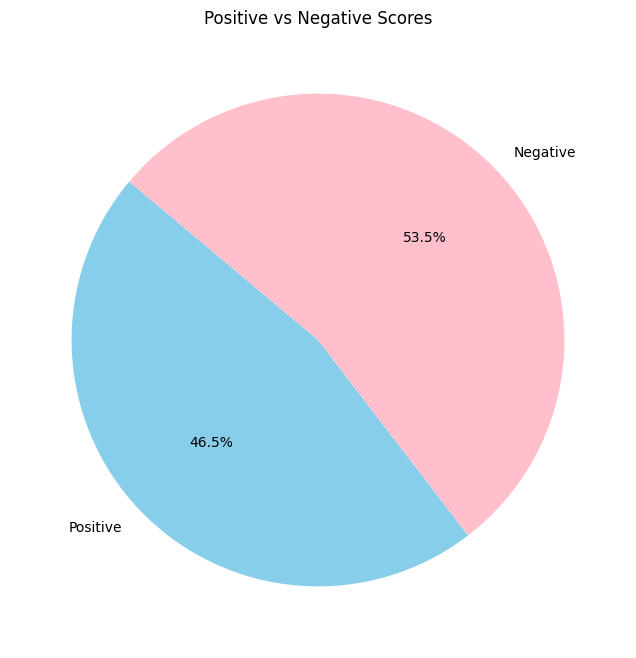

In [ ]:
# create pie chart for positive and negative scores
labels = ['Positive', 'Negative']
sizes = [total_positive_score, total_negative_score]

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'pink'])
plt.title('Positive vs Negative Scores')
plt.show()

We'd also like to explore the topic of the left and right wings of journalism in more depth. Let's improve our understanding of this topic in terms of both time and type of news. Will the results be different when we limit the type of news and when it happens? Looking forward to your answer.

Question 1 Try to identify the words in the economic news where the left-right divide is most pronounced and analyze what you think causes this phenomenon and the economic and political context behind it.


In [ ]:
# Write your code

Question 2 What are the main textual differences before and after the Russia-Ukraine War?


In [ ]:
# Write your code

##4. Reference


*   Dotson, D. M., Jacobson, S. K., Kaid, L. L., & Carlton, J. S. (2012, March 7).Media Coverage of Climate Change in Chile: A Content Analysis of Conservative and Liberal Newspapers. _Environmental Communication, 6_(1), 64-81. https://doi.org/10.1080/17524032.2011.642078

*   Edwards, D., & Cromwell, D. (2006). _Guardians of Power : The Myth of the Liberal Media._ Pluto Press. https://search-ebscohost-com.proxy-ub.rug.nl/login.aspx?direct=true&db=nlebk&AN=168054&site=ehost-live&scope=site

*   Marier, P., & Revelli, M. (2017, September). Compassionate Canadians and Conflictual Americans? Portrayals of Ageism in Liberal and Conservative Media. _Ageing & Society, 37_(8), 1632-1653. https://doi.org/10.1017/S0144686X16000544

*   Scott Trust, The. (2015, July 26). The Scott Trust: values and history. _The Guardian._ https://www.theguardian.com/the-scott-trust/2015/jul/26/the-scott-trust

